## Course Project 'Exam pass' classification (Logistic regression from scratch)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# input
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET)
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
df_train.shape

(10000, 13)

In [5]:
df_train['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

### Выборка несбалансированная, 89% на 11%. Требуется балансировка данных.

In [6]:
df_test = pd.read_csv(TEST_DATASET)
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [7]:
df_test.shape

(10000, 12)

In [8]:
df_test['qualification'].value_counts()

1.0    5000
2.0    3026
3.0    1925
4.0      49
Name: qualification, dtype: int64

### Категориальный признак, оставляем как есть

## Предобработка данных

In [9]:
X = df_train.drop(['choose','Id'],axis=1)
y = df_train['choose']

### Стандартизируем признаки 'years_of_experience','lesson_price','mean_exam_points'

In [10]:
FEATURES_TOSTANDARD = ['years_of_experience','lesson_price','mean_exam_points']

In [11]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [12]:
X_st = X.copy().astype(np.float64)
X_st[FEATURES_TOSTANDARD] = standard_scale(X_st[FEATURES_TOSTANDARD])
X_st

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,35.0,-1.117674,0.854466,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703552
1,52.0,0.014262,-0.863783,2.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.546906
2,29.0,0.580231,0.090800,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.115101
3,33.0,0.580231,-1.245616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115101
4,46.0,0.580231,1.045383,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.629995
...,...,...,...,...,...,...,...,...,...,...,...
9995,55.0,0.014262,0.854466,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.071333
9996,53.0,0.014262,-0.672866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.399793
9997,44.0,1.712167,0.090800,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.399793
9998,41.0,-1.117674,-0.004658,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.556439


### Нормализация признака 'Age'

In [13]:
def min_max_scale(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

In [14]:
# Сохраняем значения для трансформа
def minmaxvalues(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return [X_min,X_max - X_min]

In [15]:
minmax_train = minmaxvalues(X['age'])
minmax_train

[23.0, 45.0]

In [16]:
def minmax_transform(X,minmax):
    return (X - minmax[0])/minmax[1]

In [17]:
X_st['age'] = min_max_scale(X_st['age'])
X_st.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0.266667,-1.117674,0.854466,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703552
1,0.644444,0.014262,-0.863783,2.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.546906
2,0.133333,0.580231,0.090800,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.115101
3,0.222222,0.580231,-1.245616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115101
4,0.511111,0.580231,1.045383,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.629995


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.30, random_state=42)

In [19]:
X_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9069,0.555556,0.014262,-0.863783,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.399793
2603,0.733333,0.014262,-0.481950,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.723807
7738,0.422222,-1.117674,-0.959241,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.473350
1579,0.666667,-1.117674,1.045383,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997777
5058,0.555556,-1.117674,0.949924,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.659784


In [20]:
# Функция значений для стандартизации датасета Test
def train_scale(X):
    Scale_Dict = {}
    for feature in FEATURES_TOSTANDARD:
        Scale_Dict[feature] = []
        Scale_Dict[feature].append(X[feature].mean(axis=0))
        Scale_Dict[feature].append(X[feature].std(axis=0))
    return Scale_Dict

In [21]:
model_scale = train_scale(X)
model_scale

{'years_of_experience': [1.9748, 1.7668834561777664],
 'lesson_price': [1702.44, 523.7890624079063],
 'mean_exam_points': [64.4352, 13.59502421580575]}

In [22]:
# Функция стандартизации для Test
def test_transform(X,train_scale):
    X_tr = X.copy().astype(np.float64)
    for feature in FEATURES_TOSTANDARD:
        X_tr[feature] = (X_tr[feature] - model_scale[feature][0])/model_scale[feature][1]
    return X_tr

In [23]:
# Стандартизируем данные Test
test_st = test_transform(df_test, model_scale)
test_st.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000.0,32.0,0.014262,1.904507,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.880453
1,10001.0,35.0,2.278136,0.186258,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.482883
2,10002.0,44.0,0.014262,-0.959241,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.429582
3,10003.0,44.0,1.146199,2.381798,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.027565
4,10004.0,38.0,0.580231,-0.577408,2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.473350


In [24]:
# Нормализация признака age для Test
test_st['age'] = minmax_transform(test_st['age'],minmax_train)

In [25]:
test_st.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000.0,0.200000,0.014262,1.904507,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.880453
1,10001.0,0.266667,2.278136,0.186258,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.482883
2,10002.0,0.466667,0.014262,-0.959241,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.429582
3,10003.0,0.466667,1.146199,2.381798,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.027565
4,10004.0,0.333333,0.580231,-0.577408,2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.473350


## Логистическая регрессия

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
def log_loss(w, X, y):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

In [28]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
        
    return w, losses

In [29]:
def predict(w, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [30]:
w0 = np.zeros(X_train.shape[1])

n_iterations = 400
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

print(f"Итоговый вектор весов w: {w}")

Итоговый вектор весов w: age                   -0.525599
years_of_experience    0.115776
lesson_price          -0.190603
qualification         -1.028325
physics                0.093721
chemistry              0.068605
biology                0.001999
english               -0.027640
geography             -0.040588
history               -0.020853
mean_exam_points       0.845803
dtype: float64


In [31]:
y_predicted_test

array([0., 0., 0., ..., 0., 0., 0.])

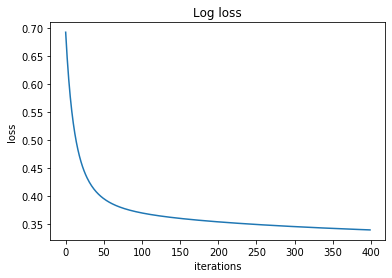

In [32]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

### Подбор оптимальных гиперпараметров дал ета=0.05 и число итерации 400 (выше 400 ошибка изменяется на очень малые значения)

### Реализуем метрику F1

In [33]:
# Precision function
def calc_precision(y, y_pred):
        y, y_pred = np.array(y), np.array(y_pred)
        if y.shape != y_pred.shape:
            raise ValueError(f'shape mismatch: "y" has shape {y.shape} and "y_pred" has shape {y_pred.shape}')
        else:
            TP = sum((y == 1) & (y_pred == 1))
            FP = sum((y == 0) & (y_pred == 1))
            return TP/(TP + FP + 1e-16)

In [34]:
# Recall function
def calc_recall(y, y_pred):
        y, y_pred = np.array(y), np.array(y_pred)
        if y.shape != y_pred.shape:
            raise ValueError(f'shape mismatch: "y" has shape {y.shape} and "y_pred" has shape {y_pred.shape}')
        else:
            TP = sum((y == 1) & (y_pred == 1))
            FN = sum((y == 1) & (y_pred == 0))
            return TP/(TP + FN + 1e-16)

In [35]:
# F1 metrics fuction
def calc_f1(y, y_pred):
    precision = calc_precision(y, y_pred)
    recall = calc_recall(y, y_pred)
    return 2/(precision + recall + 1e-16) * precision * recall

In [36]:
F1_0 = calc_f1(y_test,y_predicted_test)
F1_0

0.0057971014492753615

### Устраним несбалансированность данных

In [37]:
# Upsampling with ADASYN
from imblearn.over_sampling import ADASYN

In [38]:
ada = ADASYN(random_state=42, n_neighbors=5)

In [39]:
X_res, y_res = ada.fit_resample(X_st, y)

In [40]:
y_res.value_counts()

1    9141
0    8891
Name: choose, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [42]:
w0 = np.zeros(X_train.shape[1])

n_iterations = 400
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

print(f"Итоговый вектор весов w: {w}")

Итоговый вектор весов w: age                   -0.218007
years_of_experience    0.001431
lesson_price          -0.940316
qualification         -0.137299
physics                0.438507
chemistry              0.168251
biology                0.118993
english               -0.036688
geography             -0.028724
history               -0.046305
mean_exam_points       0.988750
dtype: float64


In [43]:
F1_1 = calc_f1(y_test,y_predicted_test)
F1_1

0.7397214297700957

In [44]:
# Используем SMOTE, укажем категориальные признаки

In [45]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[3,4,5,6,7,8,9], random_state=0,k_neighbors=5)

In [46]:
X_res1, y_res1 = smote_nc.fit_resample(X_st, y)
y_res1.value_counts()

1    8891
0    8891
Name: choose, dtype: int64

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1, test_size=0.30, random_state=42)

In [48]:
w0 = np.zeros(X_train1.shape[1])

n_iterations = 400
eta = 0.05

w, losses = optimize(w0, X_train1, y_train1, n_iterations, eta)

y_predicted_test1 = predict(w, X_test1)
y_predicted_train1 = predict(w, X_train1)

print(f"Итоговый вектор весов w: {w}")

Итоговый вектор весов w: age                   -0.221970
years_of_experience    0.031572
lesson_price          -0.970289
qualification         -0.192459
physics                0.545032
chemistry              0.143449
biology                0.031703
english               -0.140771
geography             -0.105670
history               -0.078934
mean_exam_points       1.031717
dtype: float64


In [49]:
F1_2 = calc_f1(y_test1,y_predicted_test1)
F1_2

0.7404031551270817

In [50]:
y_final_pred = predict(w,test_st.drop('Id',axis=1))

In [51]:
Final_pred = pd.concat([df_test['Id'], pd.Series(y_final_pred)], axis=1)

In [52]:
sub1 = Final_pred.rename(columns={0: 'choose'})
sub1.to_csv('Prediction1.csv',index=None)

In [53]:
calc_precision(y_test1,y_predicted_test1)

0.6908734052993131

In [54]:
calc_recall(y_test1,y_predicted_test1)

0.797583081570997

In [55]:
def calc_f1(y, y_pred):
    precision = calc_precision(y, y_pred)
    recall = calc_recall(y, y_pred)
    return 2/(precision + recall + 1e-16) * precision * recall

In [56]:
calc_f1(y_test1,y_predicted_test1)

0.7404031551270817

### Обучаем на всем датасете Train df

In [57]:
w0 = np.zeros(X_train1.shape[1])

n_iterations = 400
eta = 0.05

w, losses = optimize(w0, X_res1, y_res1, n_iterations, eta)

y_predicted_test2 = predict(w, X_test1)
y_predicted_train2 = predict(w, X_res1)

print(f"Итоговый вектор весов w: {w}")

Итоговый вектор весов w: age                   -0.240054
years_of_experience    0.034607
lesson_price          -0.974607
qualification         -0.183674
physics                0.515132
chemistry              0.166936
biology                0.038700
english               -0.136575
geography             -0.105390
history               -0.075390
mean_exam_points       1.025640
dtype: float64


In [58]:
F1_2 = calc_f1(y_res1,y_predicted_train2)
F1_2

0.7445072190834903

In [59]:
y_final_pred2 = predict(w,test_st.drop('Id',axis=1))

In [60]:
Final_pred2 = pd.concat([df_test['Id'], pd.Series(y_final_pred2)], axis=1)

In [61]:
sub2 = Final_pred.rename(columns={0: 'choose'})
sub2.to_csv('Prediction2.csv',index=None)

Оптимальный вариант - логлосс алгоритм со стандартизацией вещественных признаков, нормализацией возраста и апсэмплингом SMOTE; Метрика на Kaggle 0.81057

Доработать:Метрика ROC AUC; Класс и метод для страдартизации; регуляризация признаков для оптимизации результата; первичная визуализация признаков и матрица кореллиации